### Finds an initial learning as described [here](https://arxiv.org/abs/1506.01186)

In [1]:
import random
from argparse import Namespace

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
from pytorch_lightning import Trainer

from data_helper import LabeledDataset
from helper import collate_fn
from road_map_construction import RoadMapNetwork

matplotlib.rcParams['figure.figsize'] = [5, 5]
matplotlib.rcParams['figure.dpi'] = 200

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

args = Namespace(
    NUM_LAYERS=3,
    FEATURES_START=256,
    DROPOUT=0.5,
    LOSS="dice_loss",
    BATCH_SIZE=32,
    EPOCHS=10,
    LEARNING_RATE=0.1,
    L2_PENALTY=5e-4
)

In [2]:
model = RoadMapNetwork(hparams=args)
trainer = Trainer(gpus=1)

# Run learning rate finder
lr_finder = trainer.lr_find(model)

INFO:lightning:GPU available: True, used: True
INFO:lightning:CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:Set SLURM handle signals.
INFO:lightning:
   | Name                            | Type                 | Params
---------------------------------------------------------------------
0  | feature_extractor               | DenoisingAutoencoder | 788 K 
1  | feature_extractor.encoder       | Sequential           | 394 K 
2  | feature_extractor.encoder.0     | Conv2d               | 7 K   
3  | feature_extractor.encoder.1     | LeakyReLU            | 0     
4  | feature_extractor.encoder.2     | Conv2d               | 295 K 
5  | feature_extractor.encoder.3     | LeakyReLU            | 0     
6  | feature_extractor.encoder.4     | Conv2d               | 73 K  
7  | feature_extractor.encoder.5     | LeakyReLU            | 0     
8  | feature_extractor.encoder.6     | Conv2d               | 18 K  
9  | feature_extractor.encoder.7     | LeakyReLU            | 0     
10 | feature_extractor.dec

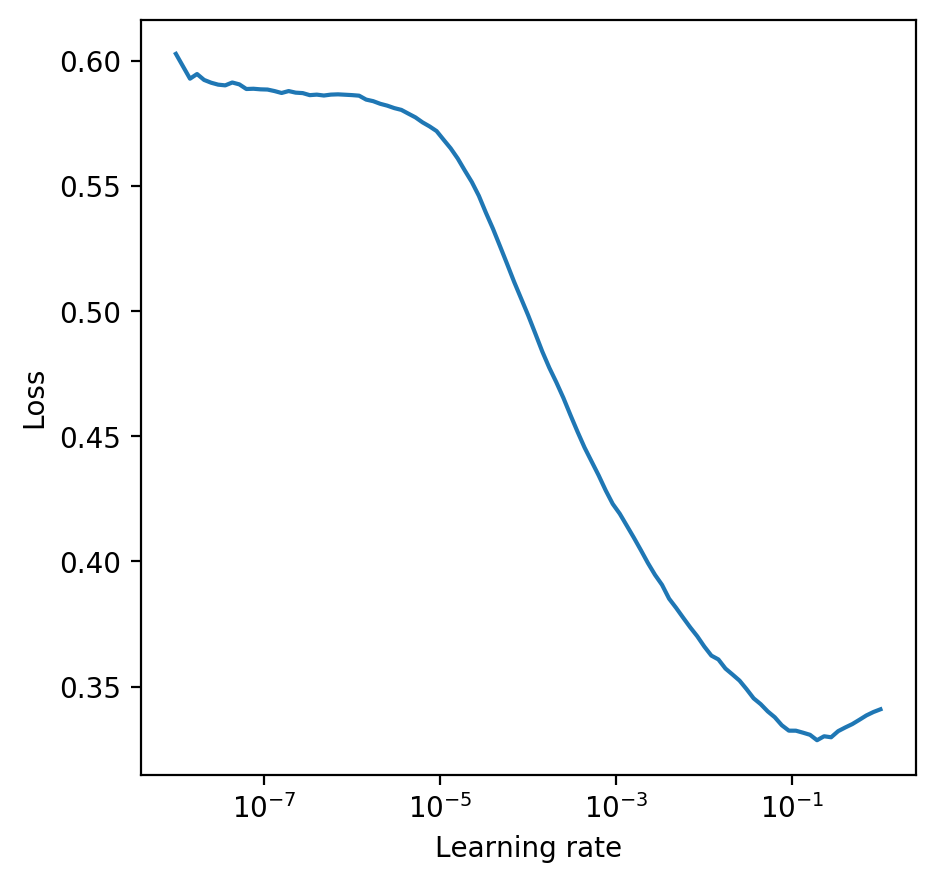

In [3]:
# Plot with
fig = lr_finder.plot(suggest=True)

In [4]:
# Pick point based on plot, or get suggestion
lr_finder.suggestion()

1e-08